<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/TP_EquaDiff_Sol_et_Champ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch17 - Notebook : Équations différentielles linéaires à coefficients constants**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

<font size = 1> source : https://moodle.univ-tln.fr/pluginfile.php/405411/mod_resource/content/8/TP1-EDO-Scipy-Sympy.html </font>

Dans le NoteBook du chapitre, nous avons fabriqué nous-mêmes de quoi représenter graphiquement un champ de tangentes et différentes solutions approchées d'une équation différentielle, par la méthode de Newton : on avance d'un pas dans la direction de la tangente, et on approxime l'image en ce nouveau point par la valeur de l'ordonnée du point de cette tangente ayant la même abscisse... et on recommence...

Ici, nous allons utiliser des fonctionnalités toutes prêtes :
*  dans le module ***SciPy***, la commande ***odeint*** (*Ordinary Differential Equation Integration*): elle permet de présenter les solutions approchées d'une équation différentielle du 1<sup>er</sup> ordre, voire du 2<sup>nd</sup>, sous réserve de la considérer en fait comme un système et de travailler matriciellement (cette astuce a déjà été pratiquée avec les suites récurrentes d'ordres 1 et 2)

* Mais nous allons aussi chercher les solutions exactes, grâce au module ***SymPy***, destiné au calcul symbolique, comme son nom l'indique... quand on le sait...

**Rien de nouveau dans ce chapitre n'est exigible au concours**

# **Principe d'utilisation de *odeint***

Le principe d’utilisation de *odeint* (pour intégrer numériquement des équations différentielles) est le suivant: pour avoir une estimation numérique de la solution du problème de :

$\left\{\begin{matrix}
 y'(t) = \phi \left ( t, y(t)) \right )
\\ y(t_0) = y_0
\end{matrix}\right.$

avec y(t) la fonction recherchée, $\phi$ une fonction de deux variables ( même pour une fonction du 1<sup>er</sup> ordre) appliquée à t et y(t), la condition initiale $y_0$, et le domaine de temps, qui débute à $t_0$



# **1.Exemple de résolution d’une équation différentielle d'ordre 1**



## **1.1. Résolution approchée**

En guise d’exemple, considérons l'équation "logistique" simple de la forme 

$y'(t) = \dfrac{3}{2} y(t) \left ( 1 - \dfrac {y(t)}{6} \right )$ avec pour condition intiale $y(0) = 1$

In [33]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from math import sqrt

In [34]:
# Création de la fonction phi
def phi(y,t) : # attention à lordre des paramètres
    return (3/2 * y * (1-y/6))

### **1.1.a/ Résolution approchée (*ie. numérique*)**

La fonction odeint peut être appelée avec au minimum trois arguments:

* la fonction φ,
* la valeur y(t0),
* le vecteur t (qui commence à $t_0$) où la fonction y sera évaluée.

Elle renvoie un vecteur, qui sera stocké dans la variable *sol*, contenant l'évaluation de la solution en les points du vecteur t.

In [35]:
# conditions initiales
t0  = 0
y0  = 1
## vecteur temps
tt  = np.linspace(t0,5,201) # 201 valeurs régulièrement espacées entre 0 iclus et 200 inclus

# résolution approchée de l'équation différentielle
sol = odeint(phi,y0,tt)

### **1.1.b/ Représentation graphique**

La solution approchée peut alors être tracée simplement

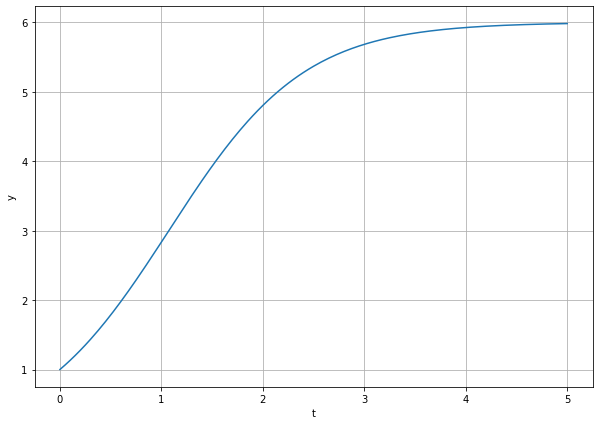

In [36]:
plt.figure(figsize=(10,7))
plt.plot(tt,sol)
plt.xlabel('t')
plt.ylabel('y')
plt.grid();


### **1.1.c/ Champ de vecteurs**

Bien qu'il soit trés rare que l'on puisse résoudre explicitement une équation différentielle donnée, on peut souvent avoir une idée de l’allure des graphes des solutions en observant le champs de vecteurs associé. En effet le graphe d'une solution de l'équation $\phi \left ( t, y(t)) \right )$ est par définition tangent à son vecteur vitesse $\left (1,y′(t) \right)$ et donc au vecteur $\left (1,\phi \left ( t, y(t)) \right ) \right). La connaissance de la fonction $\phi$ en chaque point (t,y) permet donc de représenter facilement ces vecteurs tangents même si l'on ne connait pas les solutions. Et si l'on en trace un grand nombre, uniformément répartis dans le plan (t,y), on obtient une représentation du **champ de pentes** (ou **champ de tangentes**) associé à l'équation différentielle, qui permet souvent de deviner les graphes des solutions puisqu'il s'agit des courbes qui sont tangentes en tous leurs points aux vecteurs de ce champs de vecteurs.

Il est alors intéressant d'y superposer la solution numérique obtenue avec odeint.

La fonction ***quiver*** du module *MatPlotLib* permet de tracer un champ de vecteurs. Utilisons-la pour obtenir celui associé à notre équation différentielle. La courbe rouge est la solution déterminée par *odeint*.


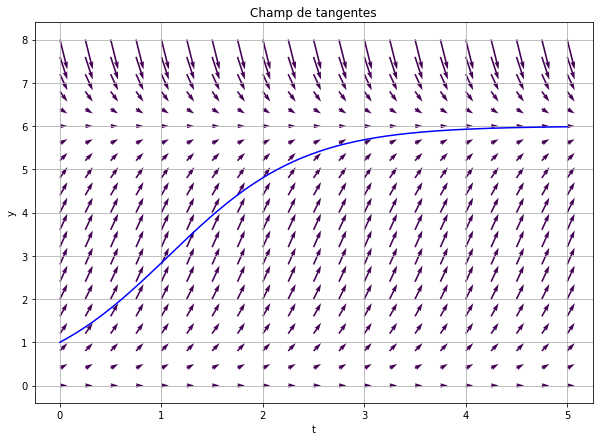

In [37]:
plt.figure(figsize=(10,7))

# quiverplot
# définit une grille et calcule la direction en chaque point
subd = 21
g1  = np.linspace(0,5,subd)
g2  = np.linspace(0,8,subd)
T,Y = np.meshgrid(g1,g2)        # crée la grille
DT = 1                          # calcule le taux d'accroissement en chaque point
DY = phi(Y,T)

# norme (=longueur) du vecteur à afficher 
M = sqrt(np.sum(np.reshape(DT**2+DY**2, subd**2, order = 'C')) ) 


# le champ de pentes
plt.quiver(T,Y, DT/M, DY/M, M)

# affichage graphique
plt.plot(tt,sol,'b')
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Champ de tangentes');

## **1.2. Reprise de l'équation différentielle avec calcul exact de la solution (*SymPy*)**

Considérons l'équation "logistique" simple de la forme 

$y'(t) = \dfrac{3}{2} y(t) \left ( 1 - \dfrac {y(t)}{6} \right )$ avec pour condition intiale $y(0) = 1$

In [38]:
#%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

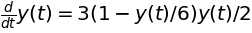

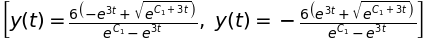

In [39]:
sym.init_printing()

t  = sym.Symbol('t')
y  = sym.Function('y')

# Fonction phi
phi= sym.Rational(3,2)*y(t)*(1-y(t)/6)

# Résolution exacte de l'équation différentielle avec Sympy
edo= sym.Eq( sym.diff(y(t),t) , phi )

display(edo)
solgen = sym.dsolve(edo,y(t)) # Toutes les solutions ('solution générale')
display(solgen)

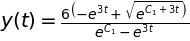

In [40]:
# Solution répondant à la condition initiale
solgen=solgen[0]
display(solgen)

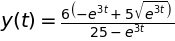

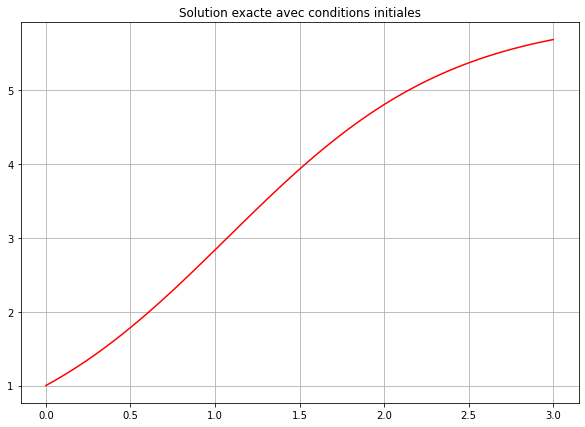

In [43]:
t0=0
y0=1
consts = sym.solve( sym.Eq( y0, solgen.rhs.subs(t,t0)) , dict=True)[0]

#solution particulière
display(consts)
solpar=solgen.subs(consts)
display(solpar) 

# transformation en fonction numérique SymPy de la solution particulière
func = sym.lambdify(t,solpar.rhs,'numpy')

# Représentation graphique

plt.figure(figsize=(10,7))
tt=np.linspace(0,3,101)
yy=func(tt)
plt.plot(tt,yy, 'r')
plt.grid()

plt.title('Solution exacte avec conditions initiales');

# **2. Résolution d'une équation différentielle du 2<sup>nd</sup> ordre**

On cherche à résoudre l'équation différentielle du 2<sup>nd</sup> ordre :

$ y'' = a \color{red}{y'} +b \color{blue}y +c ~~~~   (E)$.

On va pour cela la transformer en une écriture matricielle différentielle du 1<sup>er</sup> ordre.

Cela requiert un petit tour de passe-passe que nous allons essayer d'expliquer...

Posons $Y = \left(\begin{matrix} \color{blue}{y }\\ \color{red}{y'} \end{matrix}\right )$ alors, $Y' = \left(\begin{matrix} \color{blue}y \\ \color{red}{y'} \end{matrix}\right )' = \left(\begin{matrix} \color{red}{y'} \\ y'' \end{matrix}\right ) = \left(\begin{matrix} \color{red}{y'} \\ a \color{red}{y'} +b \color{blue}y +c \end{matrix}\right )$

Cherchons à exprimer $Y'$ en fonction de $Y$ : on chercher une fonction de 2 variables $f$ telle que $Y'=f(Y)$.

Si on pose $Y = \left(\begin{matrix} \color{blue}{Y_1 }\\ \color{red}{Y_2} \end{matrix}\right )$, les couleurs vont nous aider à repérer les divers éléments...on obtient :

$Y'  =\left(\begin{matrix} \color{red}{y'} \\ a \color{red}{y'} +b \color{blue}y +c \end{matrix}\right ) $ donc $f \left(\left(\begin{matrix} \color{blue}{Y_1 }\\ \color{red}{Y_2} \end{matrix}\right )\right ) =  \left(\begin{matrix} \color{red}{Y_2} \\ a \color{red}{Y_2} +b \color{blue}{Y_1} +c \end{matrix}\right )$

On a ainsi transformé notre équation initiale (E) d'ordre 2 en l'équation d'ordre 1 : $Y'=f (Y)$, si ce n'est qu'ici, nous travaillons matriciellement (sur un système, en fait...)

In [95]:
from scipy.integrate import odeint
import numpy as np

# Résolution de l'équation différentielle y'' = a.y' + b.y + c
#####
# exemple : y'' + y' +2.y = 1 <==> y'' = -y' - 2.y + 1
# Définition des paramètres 
a = -1
b = -2
c =  1

# remarque : avec a=-1, b=-2, c=1 , le discriminant de l'équation caractéristique est négatif,
#               elle n'a donc pas de racines réelles... 
#               mais pour autant, l'équation différentielle a des solutions, c'est juste qu'on ne sait pas les calculer en ECG...

# Définition des conditions initiales
y0 = 1 # y(t_0)
yp0 = 1 # y'(t_0)

def phi(Y,t) :
    return [Y[1] , a*Y[1] + b*Y[0] + c]


tt = np.linspace(y0,10,201)

sol = odeint(phi, [y0,yp0],tt)

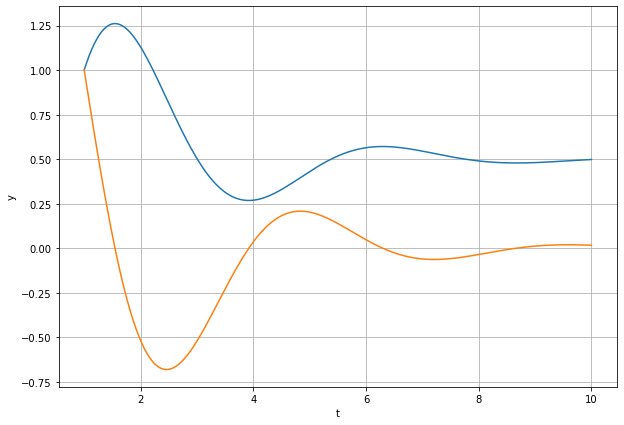

In [96]:
plt.figure(figsize=(10,7))
plt.plot(tt,sol)
plt.xlabel('t')
plt.ylabel('y')
plt.grid();

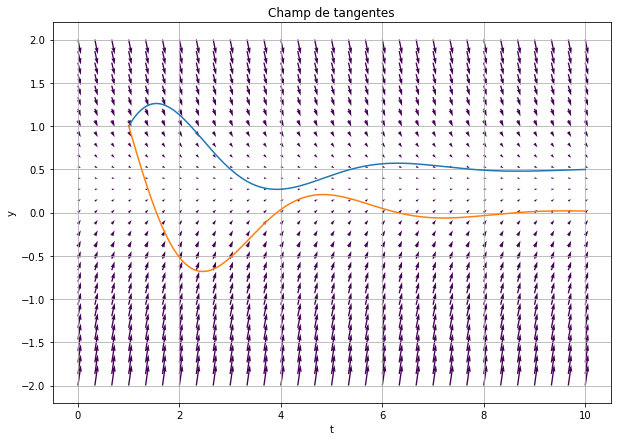

In [102]:
plt.figure(figsize=(10,7))

# quiverplot
# définit une grille et calcule la direction en chaque point
subd = 31
g1  = np.linspace(0,10,subd)
g2  = np.linspace(-2,2,subd)
T,Y = np.meshgrid(g1,g2)        # crée la grille
DT = 1                          # calcule le taux d'accroissement en chaque point
DY = phi([Y,Y],T)

# norme (=longueur) du vecteur à afficher 
#M = sqrt(np.sum(np.reshape(DT**2+DY**2, subd**2, order = 'C')) ) 


# le champ de pentes
#plt.quiver(T,Y, DT/M, DY/M, M) # avec vecteurs normés
plt.quiver(T,Y, np.array(DT), np.array(DY[1]), 1)

# affichage graphique
plt.plot(tt,sol)
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Champ de tangentes');

In [86]:
DY

[array([1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
        1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25]),
 array([-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
        -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
        -0.25, -0.25, -0.25])]